In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
# Ce paquet est important car il y a plusieur de methodes pour mesurer
# la performance des modèles obtenus.
from sklearn import metrics
import time

In [4]:
# D'abord, il faut télécharger la base de données MNIST:
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)

(70000, 784)


In [5]:
# Maintenant, nous devons diviser les données en deux parties : 
# - Les données d'apprentissage, pour entraîner le modèle;
# - Les données de tests, rpour la validation du modèle.
# La proportion de la division choisi était de 70% de données utilisées pour l'entrainement et 30% pour le tests comme prévu
# dans le sujet du TP2
# La division des données prends un rôle très important, vu que plus de données d'entraînement resultera dans un
# modèle plus précis, mais plus de données de test rendra un test plus efficace du modèle.
data = mnist.data
target = mnist.target
xtrain, xtest, ytrain, ytest = train_test_split(data,target, train_size = 0.7)



In [6]:
#Ici, on commence par tester un réseau de neurone avec une seule couche cachée de 50 neurones
modele = MLPClassifier(hidden_layer_sizes=(50,))
# Maintenant, qu'on a défini le modèle, il faut l'entraîner avec les données séparés précédement et cela se fait avec 
# le méthode .fit. 
modele.fit(xtrain,ytrain)
# Après avoir entrainé le modèle, on veut mesurer sa qualité, et on fait cela avec le méthode .score, qui nous 
# donne la précision du modèle par rapport à l'ensemble mi comme paramètre.
acc = modele.score(xtest,ytest)
print(acc)

0.945047619047619


la vraie image 3
l image prédite ['3']


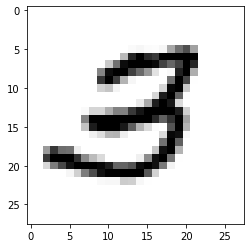

In [11]:
#Visualisation des données
print('la vraie image',ytest[4])
print('l image prédite',modele.predict([xtest[4]]))
# Ici, nous voulons modifier la représentation de la donnée de dimension 784 dans une donnée de dimension 28x28
image_test = xtest.reshape((-1, 28, 28))
plt.imshow(image_test[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

In [14]:
#précision en utilisant le package
ypredTest = modele.predict(xtest)
print("précision du modèle à 1 couche de 50 neurones : ",metrics.precision_score(ytest,ypredTest,average='micro'))

précision du modèle à 1 couche de 50 neurones :  0.958


In [5]:
#Variation nombre de neurones dans la deuxième couche
for i in range(10,51,10):
    modele = MLPClassifier(hidden_layer_sizes=(50,i))
    modele.fit(xtrain,ytrain)
    acc = modele.score(xtest,ytest)
    print(i,' neuronnes dans la couche', 'précision : ',acc)

10  neuronnes dans la couche précision :  0.953952380952381
20  neuronnes dans la couche précision :  0.9579047619047619
30  neuronnes dans la couche précision :  0.9553333333333334
40  neuronnes dans la couche précision :  0.957952380952381
50  neuronnes dans la couche précision :  0.958


In [4]:
#2 couches de 50 neurones

layers = []
nb_couches = 2
for i in range(nb_couches):
    layers.append(50) #création d'une liste [50,50]
    
modele = MLPClassifier(hidden_layer_sizes=layers)
seconds = time.time()
# Phase d'apprentissage
modele.fit(xtrain,ytrain)
# Fin de la phase d'apprentissage
seconds2=time.time()
print('Temps d apprentissage :', seconds2-seconds, 's')
acc = modele.score(xtest,ytest)
print('Précision du modèle sur la base de test :', acc)
acc = modele.score(xtrain,ytrain)
print('Précision du modèle sur la base d entrainement :', acc)
ypred = modele.predict(xtest)
error_ratio = metrics.zero_one_loss(ytest,ypred)
print('Taux d Erreur du modèle sur la base de test :', error_ratio)

Temps d apprentissage : 53.375056982040405 s
Précision du modèle sur la base de test : 0.9626666666666667
Précision du modèle sur la base d entrainement : 0.9971020408163266
Taux d Erreur du modèle sur la base de test : 0.03733333333333333


In [7]:
#10 couches de 50 neurones

layers = []
nb_couches = 10
for i in range(nb_couches):
    layers.append(50)
    
modele = MLPClassifier(hidden_layer_sizes=layers)
seconds = time.time()
# Phase d'apprentissage
modele.fit(xtrain,ytrain)
# Fin de la phase d'apprentissage
seconds2=time.time()
print('Temps d apprentissage :', seconds2-seconds, 's')
acc = modele.score(xtest,ytest)
print('Précision du modèle sur la base de test :', acc)
acc = modele.score(xtrain,ytrain)
print('Précision du modèle sur la base d entrainement :', acc)

Temps d apprentissage : 41.4510977268219 s
Précision du modèle sur la base de test : 0.9672857142857143
Précision du modèle sur la base d entrainement : 0.9942448979591837


In [8]:
#20 couches de 50 neurones

layers = []
nb_couches = 20
for i in range(nb_couches):
    layers.append(50)
    
modele = MLPClassifier(hidden_layer_sizes=layers)
seconds = time.time()
# Phase d'apprentissage
modele.fit(xtrain,ytrain)
# Fin de la phase d'apprentissage
seconds2=time.time()
print('Temps d apprentissage :', seconds2-seconds, 's')
acc = modele.score(xtest,ytest)
print('Précision du modèle sur la base de test :', acc)
acc = modele.score(xtrain,ytrain)
print('Précision du modèle sur la base d entrainement :', acc)

Temps d apprentissage : 74.93972778320312 s
Précision du modèle sur la base de test : 0.9661904761904762
Précision du modèle sur la base d entrainement : 0.9891020408163266


In [11]:
#Variation de la fonction d'activation
#Modèle à 10 couches cachées de 50 neurones
layers = []
nb_couches = 10
activations = ['relu', 'logistic', 'tanh', 'identity']
for i in range(nb_couches):
    layers.append(50)
for i in activations:# Changement de chaque fonction d'activation du modèle
    modele = MLPClassifier(hidden_layer_sizes=layers, activation = i)
    seconds = time.time()
    # Phase d'apprentissage
    modele.fit(xtrain,ytrain)
    # Fin de la phase d'apprentissage
    seconds2=time.time()
    print('---------------------------------------------------------')
    print('Fonction d activation utilisée :', i)
    print('Temps d apprentissage :', seconds2-seconds, 's')
    acc = modele.score(xtest,ytest)
    print('Précision du modèle sur la base de test :', acc)
    acc = modele.score(xtrain,ytrain)
    print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Fonction d activation utilisée : relu
Temps d apprentissage : 68.59344959259033 s
Précision du modèle sur la base de test : 0.9713809523809523
Précision du modèle sur la base d entrainement : 0.997061224489796
---------------------------------------------------------
Fonction d activation utilisée : logistic
Temps d apprentissage : 33.93632245063782 s
Précision du modèle sur la base de test : 0.11376190476190476
Précision du modèle sur la base d entrainement : 0.112
---------------------------------------------------------
Fonction d activation utilisée : tanh
Temps d apprentissage : 42.578407764434814 s
Précision du modèle sur la base de test : 0.9308095238095239
Précision du modèle sur la base d entrainement : 0.9374489795918367
---------------------------------------------------------
Fonction d activation utilisée : identity
Temps d apprentissage : 22.214052438735962 s
Précision du modèle sur la base de test : 0.907380952380

In [53]:
layers = []
nb_couches = 40
for i in range(nb_couches):
    layers.append(50)
    
modele = MLPClassifier(hidden_layer_sizes=layers, activation = 'relu')
seconds = time.time()
# Phase d'apprentissage
modele.fit(xtrain,ytrain)
# Fin de la phase d'apprentissage
seconds2=time.time()
print('Temps d apprentissage :', seconds2-seconds, 's')
acc = modele.score(xtest,ytest)
print('Précision du modèle sur la base de test :', acc)
acc = modele.score(xtrain,ytrain)
print('Précision du modèle sur la base d entrainement :', acc)
# La taille de la base de données d'apprentissage n'est pas assez grande
# pour faire la fonction objectif tomber sur un minimum local proche du
# minimum global.
# Chaque fois qu'on augmente la complexité du modèle, la fonction objectif,
# responsable pour la convergence de la phase d'apprentissage, devient plus
# complèxe, en augmentant le nombre de minimum locales, ce qui difficulte
# la convergence de l'algorithme.

Temps d apprentissage : 78.683109998703  s
Précision du modèle sur la base de test : 0.8220952380952381
Précision du modèle sur la base d entrainement : 0.8277551020408164


In [15]:
#Variation des fonctions d'activation
layers = []
nb_couches = 2
activations = ['relu', 'logistic', 'tanh', 'identity']
for i in range(nb_couches):
    layers.append(50)
for i in activations:# Changement de chaque fonction d'activation du modèle
    modele = MLPClassifier(hidden_layer_sizes=layers, activation = i)
    seconds = time.time()
    # Phase d'apprentissage
    modele.fit(xtrain,ytrain)
    # Fin de la phase d'apprentissage
    seconds2=time.time()
    print('---------------------------------------------------------')
    print('Fonction d activation utilisée :', i)
    print('Temps d apprentissage :', seconds2-seconds, 's')
    acc = modele.score(xtest,ytest)
    print('Précision du modèle sur la base de test :', acc)
    acc = modele.score(xtrain,ytrain)
    print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Fonction d activation utilisée : relu
Temps d apprentissage : 50.4870388507843 s
Précision du modèle sur la base de test : 0.9557142857142857
Précision du modèle sur la base d entrainement : 0.9929591836734694
---------------------------------------------------------
Fonction d activation utilisée : logistic
Temps d apprentissage : 42.019301652908325 s
Précision du modèle sur la base de test : 0.9486666666666667
Précision du modèle sur la base d entrainement : 0.955
---------------------------------------------------------
Fonction d activation utilisée : tanh
Temps d apprentissage : 36.75749683380127 s
Précision du modèle sur la base de test : 0.9392857142857143
Précision du modèle sur la base d entrainement : 0.9428571428571428
---------------------------------------------------------
Fonction d activation utilisée : identity
Temps d apprentissage : 53.992223501205444 s
Précision du modèle sur la base de test : 0.9130476190476

In [8]:
layers = []
nb_couches = 2
for i in range(nb_couches):
    layers.append(50)
    
modele = MLPClassifier(hidden_layer_sizes=layers, activation = 'logistic', max_iter = 400)
seconds = time.time()
# Phase d'apprentissage
modele.fit(xtrain,ytrain)
# Fin de la phase d'apprentissage
seconds2=time.time()
print('---------------------------------------------------------')
print('Fonction d activation utilisée :', 'logistic')
print('Temps d apprentissage :', seconds2-seconds, 's')
acc = modele.score(xtest,ytest)
print('Précision du modèle sur la base de test :', acc)
acc = modele.score(xtrain,ytrain)
print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Fonction d activation utilisée : logistic
Temps d apprentissage : 91.85904550552368 s
Précision du modèle sur la base de test : 0.9506666666666667
Précision du modèle sur la base d entrainement : 0.9627551020408164


In [9]:
layers = []
nb_couches = 2
activations = ['relu', 'logistic', 'tanh', 'identity']
for i in range(nb_couches):
    layers.append(50)
for i in activations:# Changement de chaque fonction d'activation du modèle
    modele = MLPClassifier(hidden_layer_sizes=layers, activation = i, max_iter = 400)
    seconds = time.time()
    # Phase d'apprentissage
    modele.fit(xtrain,ytrain)
    # Fin de la phase d'apprentissage
    seconds2=time.time()
    print('---------------------------------------------------------')
    print('Fonction d activation utilisée :', i)
    print('Temps d apprentissage :', seconds2-seconds, 's')
    acc = modele.score(xtest,ytest)
    print('Précision du modèle sur la base de test :', acc)
    acc = modele.score(xtrain,ytrain)
    print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Fonction d activation utilisée : relu
Temps d apprentissage : 132.19964814186096 s
Précision du modèle sur la base de test : 0.9529047619047619
Précision du modèle sur la base d entrainement : 0.9929591836734694
---------------------------------------------------------
Fonction d activation utilisée : logistic
Temps d apprentissage : 139.7381706237793 s
Précision du modèle sur la base de test : 0.9527619047619048
Précision du modèle sur la base d entrainement : 0.9667551020408163
---------------------------------------------------------
Fonction d activation utilisée : tanh
Temps d apprentissage : 91.85152959823608 s
Précision du modèle sur la base de test : 0.9398095238095238
Précision du modèle sur la base d entrainement : 0.9493469387755102
---------------------------------------------------------
Fonction d activation utilisée : identity
Temps d apprentissage : 132.94265937805176 s
Précision du modèle sur la base de test : 0

In [10]:
layers = []
nb_couches = 3
activations = ['relu', 'logistic', 'tanh', 'identity']
for i in range(nb_couches):
    layers.append(50)
for i in activations:# Changement de chaque fonction d'activation du modèle
    modele = MLPClassifier(hidden_layer_sizes=layers, activation = i, max_iter = 400)
    seconds = time.time()
    # Phase d'apprentissage
    modele.fit(xtrain,ytrain)
    # Fin de la phase d'apprentissage
    seconds2=time.time()
    print('---------------------------------------------------------')
    print('Fonction d activation utilisée :', i)
    print('Temps d apprentissage :', seconds2-seconds, 's')
    acc = modele.score(xtest,ytest)
    print('Précision du modèle sur la base de test :', acc)
    acc = modele.score(xtrain,ytrain)
    print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Fonction d activation utilisée : relu
Temps d apprentissage : 92.86568331718445 s
Précision du modèle sur la base de test : 0.9613333333333334
Précision du modèle sur la base d entrainement : 0.9960408163265306
---------------------------------------------------------
Fonction d activation utilisée : logistic
Temps d apprentissage : 166.30771207809448 s
Précision du modèle sur la base de test : 0.9534285714285714
Précision du modèle sur la base d entrainement : 0.9657959183673469
---------------------------------------------------------
Fonction d activation utilisée : tanh
Temps d apprentissage : 92.16120958328247 s
Précision du modèle sur la base de test : 0.942047619047619
Précision du modèle sur la base d entrainement : 0.9531632653061225
---------------------------------------------------------
Fonction d activation utilisée : identity
Temps d apprentissage : 133.89125084877014 s
Précision du modèle sur la base de test : 0.

In [17]:
#Variation alpha
layers = []
nb_couches = 10
alpha = [0.0001, 0.001, 0.005, 0.01, 0.05 , 0.1]
for i in range(nb_couches):
    layers.append(50)
for i in alpha:# Changement de chaque fonction d'activation du modèle
    modele = MLPClassifier(hidden_layer_sizes=layers, alpha = i)
    seconds = time.time()
    # Phase d'apprentissage
    modele.fit(xtrain,ytrain)
    # Fin de la phase d'apprentissage
    seconds2=time.time()
    print('---------------------------------------------------------')
    print('Alpha utilisé :', i)
    print('Temps d apprentissage :', seconds2-seconds, 's')
    acc = modele.score(xtest,ytest)
    print('Précision du modèle sur la base de test :', acc)
    acc = modele.score(xtrain,ytrain)
    print('Précision du modèle sur la base d entrainement :', acc)

---------------------------------------------------------
Alpha utilisé : 0.0001
Temps d apprentissage : 69.24090957641602 s
Précision du modèle sur la base de test : 0.9706190476190476
Précision du modèle sur la base d entrainement : 0.997265306122449
---------------------------------------------------------
Alpha utilisé : 0.001
Temps d apprentissage : 61.0342800617218 s
Précision du modèle sur la base de test : 0.9704285714285714
Précision du modèle sur la base d entrainement : 0.9977755102040816
---------------------------------------------------------
Alpha utilisé : 0.005
Temps d apprentissage : 62.87199592590332 s
Précision du modèle sur la base de test : 0.9702857142857143
Précision du modèle sur la base d entrainement : 0.9959183673469387
---------------------------------------------------------
Alpha utilisé : 0.01
Temps d apprentissage : 66.56155753135681 s
Précision du modèle sur la base de test : 0.971
Précision du modèle sur la base d entrainement : 0.9979591836734694
---

In [ ]:
# Ici, on varie tous les paramètres, pour voir s'il y a une dépendence entre chaque paramètre.
layers = []
nb_couches = [2, 5, 7, 10]
activations = ['relu', 'logistic', 'tanh', 'identity']
solvers = ['adam', 'lbfgs', 'sgd']
alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010]

for i in activations:# Changement de chaque fonction d'activation du modèle
    for j in alphas:
        for k in solvers:
            for l in nb_couches:
                for m in range(l):
                    layers.append(50)
                modele = MLPClassifier(hidden_layer_sizes = layers, activation = i,alpha = j, solver = k, max_iter = 400)
                seconds = time.time()
                # Phase d'apprentissage
                modele.fit(xtrain,ytrain)
                # Fin de la phase d'apprentissage
                seconds2=time.time()
                print('###########################################################################################')
                print('Nombre de Couches utilisées :', l)
                print('Fonction d activation utilisée :', i)
                print('Solver utilisée :', k)
                print('Alpha utilisée :', j)
                print('------------------------------------------------------------------')
                print('Temps d apprentissage :', seconds2-seconds, 's')
                acc = modele.score(xtest,ytest)
                print('Précision du modèle sur la base de test :', 100*acc, "%")
                acc = modele.score(xtrain,ytrain)
                print('Précision du modèle sur la base d entrainement :', 100*acc, "%")
                ypred = modele.predict(xtest)
                error_ratio = metrics.zero_one_loss(ytest,ypred)
                print('Taux d Erreur du modèle sur la base de test :', 100*error_ratio, "%")

###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 98.07882046699524 s
Précision du modèle sur la base de test : 95.60952380952381 %
Précision du modèle sur la base d entrainement : 99.3265306122449 %
Taux d Erreur du modèle sur la base de test : 4.390476190476189 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 109.14330554008484 s
Précision du modèle sur la base de test : 96.78571428571429 %
Précision du modèle sur la base d entrainement : 99.81020408163266 %
Taux d Erreur du modèle sur la b

Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : lbfgs
Alpha utilisée : 0.0002
------------------------------------------------------------------
Temps d apprentissage : 70.40731644630432 s
Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : lbfgs
Alpha utilisée : 0.0002
------------------------------------------------------------------
Temps d apprentissage : 53.123610496520996 s
Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base

Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : sgd
Alpha utilisée : 0.0003
------------------------------------------------------------------
Temps d apprentissage : 271.1544349193573 s
Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : sgd
Alpha utilisée : 0.0003
------------------------------------------------------------------
Temps d apprentissage : 279.1625807285309 s
Précision du modèle sur la ba

Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0005
------------------------------------------------------------------
Temps d apprentissage : 397.5617423057556 s
Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0005
------------------------------------------------------------------
Temps d 

Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : lbfgs
Alpha utilisée : 0.0006
------------------------------------------------------------------
Temps d apprentissage : 892.2488420009613 s
Précision du modèle sur la base de test : 11.195238095238096 %
Précision du modèle sur la base d entrainement : 11.277551020408163 %
Taux d Erreur du modèle sur la base de test : 88.8047619047619 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : lbfgs
Alpha utilisée : 0.0006
------------------------------------------------------------------
Temps 

In [6]:
layers = []
nb_couches = [2, 5, 7, 10]
activations = ['relu', 'logistic', 'tanh', 'identity']
solvers = ['adam', 'lbfgs', 'sgd']
for l in nb_couches:
    for m in range(l):
        layers.append(50)
    for i in activations:# Changement de chaque fonction d'activation du modèle
        for k in solvers:
            modele = MLPClassifier(hidden_layer_sizes = layers, activation = i,alpha = 0.0001, solver = k, max_iter = 400)
            seconds = time.time()
            # Phase d'apprentissage
            modele.fit(xtrain,ytrain)
            # Fin de la phase d'apprentissage
            seconds2=time.time()
            print('###########################################################################################')
            print('Nombre de Couches utilisées :', l)
            print('Fonction d activation utilisée :', i)
            print('Solver utilisée :', k)
            print('Alpha utilisée :', 0.0001)
            print('------------------------------------------------------------------')
            print('Temps d apprentissage :', seconds2-seconds, 's')
            acc = modele.score(xtest,ytest)
            print('Précision du modèle sur la base de test :', 100*acc, "%")
            acc = modele.score(xtrain,ytrain)
            print('Précision du modèle sur la base d entrainement :', 100*acc, "%")
            ypred = modele.predict(xtest)
            error_ratio = metrics.zero_one_loss(ytest,ypred)
            print('Taux d Erreur du modèle sur la base de test :', 100*error_ratio, "%")

###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 125.0672550201416 s
Précision du modèle sur la base de test : 96.12380952380953 %
Précision du modèle sur la base d entrainement : 99.46122448979592 %
Taux d Erreur du modèle sur la base de test : 3.8761904761904775 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : lbfgs
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 190.0827031135559 s
Précision du modèle sur la base de test : 94.85238095238095 %
Précision du modèle sur la base d entrainement : 97.94285714285714 %
Taux d Erreur du modèle sur la

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : identity
Solver utilisée : sgd
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 422.35723876953125 s
Précision du modèle sur la base de test : 9.904761904761905 %
Précision du modèle sur la base d entrainement : 9.842857142857143 %
Taux d Erreur du modèle sur la base de test : 90.0952380952381 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 160.47377562522888 s
Précision du modèle sur la base de test : 96.8047619047619 %
Précision du modèle sur la base d entrainement : 99.58367346938776 %
Taux d Erreur du modèle sur l

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : identity
Solver utilisée : sgd
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 604.8697032928467 s
Précision du modèle sur la base de test : 9.904761904761905 %
Précision du modèle sur la base d entrainement : 9.842857142857143 %
Taux d Erreur du modèle sur la base de test : 90.0952380952381 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 288.64830112457275 s
Précision du modèle sur la base de test : 97.37619047619047 %
Précision du modèle sur la base d entrainement : 99.8265306122449 %
Taux d Erreur du modèle sur la

KeyboardInterrupt: 

In [9]:
layers = []
nb_couches = [2, 5, 7, 10]
activations = ['relu', 'logistic', 'tanh', 'identity']
alphas = [0.00001, 0.00003, 0.00005, 0.00007, 0.00009, 0.0001, 0.0003, 0.0005, 0.0007, 0.001]
for l in nb_couches:
    for m in range(l):
        layers.append(50)
    for i in activations:# Changement de chaque fonction d'activation du modèle
        for k in alphas:
            modele = MLPClassifier(hidden_layer_sizes = layers, activation = i,alpha = k, solver = 'adam', max_iter = 400)
            seconds = time.time()
            # Phase d'apprentissage
            modele.fit(xtrain,ytrain)
            # Fin de la phase d'apprentissage
            seconds2=time.time()
            print('###########################################################################################')
            print('Nombre de Couches utilisées :', l)
            print('Fonction d activation utilisée :', i)
            print('Solver utilisée :', 'adam')
            print('Alpha utilisée :', k)
            print('------------------------------------------------------------------')
            print('Temps d apprentissage :', seconds2-seconds, 's')
            acc = modele.score(xtest,ytest)
            print('Précision du modèle sur la base de test :', 100*acc, "%")
            acc = modele.score(xtrain,ytrain)
            print('Précision du modèle sur la base d entrainement :', 100*acc, "%")
            ypred = modele.predict(xtest)
            error_ratio = metrics.zero_one_loss(ytest,ypred)
            print('Taux d Erreur du modèle sur la base de test :', 100*error_ratio, "%")

###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 1e-05
------------------------------------------------------------------
Temps d apprentissage : 109.03505396842957 s
Précision du modèle sur la base de test : 95.69047619047619 %
Précision du modèle sur la base d entrainement : 99.58979591836736 %
Taux d Erreur du modèle sur la base de test : 4.3095238095238075 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 3e-05
------------------------------------------------------------------
Temps d apprentissage : 80.05057525634766 s
Précision du modèle sur la base de test : 94.63333333333334 %
Précision du modèle sur la base d entrainement : 98.55714285714285 %
Taux d Erreur du modèle sur la b

Taux d Erreur du modèle sur la base de test : 5.09047619047619 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.0003
------------------------------------------------------------------
Temps d apprentissage : 167.96129965782166 s
Précision du modèle sur la base de test : 94.65238095238095 %
Précision du modèle sur la base d entrainement : 95.57755102040815 %
Taux d Erreur du modèle sur la base de test : 5.3476190476190455 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.0005
------------------------------------------------------------------
Temps d apprentissage : 106.79066681861877 s
Précision du modèle sur la base de test : 94.87142857142857 %
Précision du modèle sur l

Précision du modèle sur la base d entrainement : 92.66938775510204 %
Taux d Erreur du modèle sur la base de test : 9.309523809523812 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : identity
Solver utilisée : adam
Alpha utilisée : 5e-05
------------------------------------------------------------------
Temps d apprentissage : 234.45928955078125 s
Précision du modèle sur la base de test : 91.44285714285715 %
Précision du modèle sur la base d entrainement : 93.91224489795918 %
Taux d Erreur du modèle sur la base de test : 8.557142857142852 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : identity
Solver utilisée : adam
Alpha utilisée : 7e-05
------------------------------------------------------------------
Temps d apprentissage : 306.0098729133606 s
Précision du modèle s

Précision du modèle sur la base de test : 96.85238095238095 %
Précision du modèle sur la base d entrainement : 99.59795918367347 %
Taux d Erreur du modèle sur la base de test : 3.1476190476190435 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0007
------------------------------------------------------------------
Temps d apprentissage : 256.19086837768555 s
Précision du modèle sur la base de test : 97.0904761904762 %
Précision du modèle sur la base d entrainement : 99.76734693877552 %
Taux d Erreur du modèle sur la base de test : 2.9095238095238063 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.001
------------------------------------------------------------------
Temps d a

Précision du modèle sur la base de test : 93.75714285714287 %
Précision du modèle sur la base d entrainement : 94.62857142857143 %
Taux d Erreur du modèle sur la base de test : 6.242857142857138 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : tanh
Solver utilisée : adam
Alpha utilisée : 9e-05
------------------------------------------------------------------
Temps d apprentissage : 87.05556464195251 s
Précision du modèle sur la base de test : 92.9952380952381 %
Précision du modèle sur la base d entrainement : 93.25510204081633 %
Taux d Erreur du modèle sur la base de test : 7.004761904761903 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : tanh
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d appr

Précision du modèle sur la base d entrainement : 93.65918367346939 %
Taux d Erreur du modèle sur la base de test : 8.42857142857143 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 1e-05
------------------------------------------------------------------
Temps d apprentissage : 165.5296757221222 s
Précision du modèle sur la base de test : 97.43809523809523 %
Précision du modèle sur la base d entrainement : 99.76122448979592 %
Taux d Erreur du modèle sur la base de test : 2.5619047619047652 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 3e-05
------------------------------------------------------------------
Temps d apprentissage : 147.34855246543884 s
Précision du modèle sur la ba

Taux d Erreur du modèle sur la base de test : 89.1 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.0003
------------------------------------------------------------------
Temps d apprentissage : 105.26236510276794 s
Précision du modèle sur la base de test : 10.9 %
Précision du modèle sur la base d entrainement : 11.40408163265306 %
Taux d Erreur du modèle sur la base de test : 89.1 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.0005
------------------------------------------------------------------
Temps d apprentissage : 133.81266927719116 s
Précision du modèle sur la base de test : 10.9 %
Précision du modèle sur la base d entrainement : 11.40408163265306 %
Taux d E

###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : identity
Solver utilisée : adam
Alpha utilisée : 5e-05
------------------------------------------------------------------
Temps d apprentissage : 92.50120568275452 s
Précision du modèle sur la base de test : 90.60476190476192 %
Précision du modèle sur la base d entrainement : 92.01836734693877 %
Taux d Erreur du modèle sur la base de test : 9.39523809523809 %
###########################################################################################
Nombre de Couches utilisées : 7
Fonction d activation utilisée : identity
Solver utilisée : adam
Alpha utilisée : 7e-05
------------------------------------------------------------------
Temps d apprentissage : 73.92933702468872 s
Précision du modèle sur la base de test : 91.04761904761904 %
Précision du modèle sur la base d entrainement : 92.51836734693877 %
Taux d Erreur du modèle sur

Taux d Erreur du modèle sur la base de test : 3.080952380952384 %
###########################################################################################
Nombre de Couches utilisées : 10
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0007
------------------------------------------------------------------
Temps d apprentissage : 267.05453181266785 s
Précision du modèle sur la base de test : 96.51428571428572 %
Précision du modèle sur la base d entrainement : 98.06530612244899 %
Taux d Erreur du modèle sur la base de test : 3.485714285714281 %
###########################################################################################
Nombre de Couches utilisées : 10
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.001
------------------------------------------------------------------
Temps d apprentissage : 209.95822548866272 s
Précision du modèle sur la base de test : 96.70476190476191 %
Précision du modèle sur la base 

Précision du modèle sur la base de test : 92.34285714285714 %
Précision du modèle sur la base d entrainement : 92.62448979591836 %
Taux d Erreur du modèle sur la base de test : 7.657142857142862 %
###########################################################################################
Nombre de Couches utilisées : 10
Fonction d activation utilisée : tanh
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 116.56692290306091 s
Précision du modèle sur la base de test : 91.09047619047618 %
Précision du modèle sur la base d entrainement : 91.23877551020408 %
Taux d Erreur du modèle sur la base de test : 8.909523809523812 %
###########################################################################################
Nombre de Couches utilisées : 10
Fonction d activation utilisée : tanh
Solver utilisée : adam
Alpha utilisée : 0.0003
------------------------------------------------------------------
Temps d

In [11]:
layers = []
nb_couches = [2, 5, 7, 10]
activations = ['relu', 'logistic', 'tanh', 'identity']
alphas = [0.0001, 0.001, 0.005, 0.1, 0.15, 0.5, 1, 2, 4, 8, 16, 32]
for l in nb_couches:
    for m in range(l):
        layers.append(50)
    for k in alphas:
        modele = MLPClassifier(hidden_layer_sizes = layers, activation = 'relu',alpha = k, solver = 'adam', max_iter = 400)
        seconds = time.time()
        # Phase d'apprentissage
        modele.fit(xtrain,ytrain)
        # Fin de la phase d'apprentissage
        seconds2=time.time()
        print('###########################################################################################')
        print('Nombre de Couches utilisées :', l)
        print('Fonction d activation utilisée :', 'relu')
        print('Solver utilisée :', 'adam')
        print('Alpha utilisée :', k)
        print('------------------------------------------------------------------')
        print('Temps d apprentissage :', seconds2-seconds, 's')
        acc = modele.score(xtest,ytest)
        print('Précision du modèle sur la base de test :', 100*acc, "%")
        acc = modele.score(xtrain,ytrain)
        print('Précision du modèle sur la base d entrainement :', 100*acc, "%")
        ypred = modele.predict(xtest)
        error_ratio = metrics.zero_one_loss(ytest,ypred)
        print('Taux d Erreur du modèle sur la base de test :', 100*error_ratio, "%")

###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 172.109454870224 s
Précision du modèle sur la base de test : 95.91904761904762 %
Précision du modèle sur la base d entrainement : 99.38163265306123 %
Taux d Erreur du modèle sur la base de test : 4.080952380952385 %
###########################################################################################
Nombre de Couches utilisées : 2
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.001
------------------------------------------------------------------
Temps d apprentissage : 150.22005605697632 s
Précision du modèle sur la base de test : 96.34285714285714 %
Précision du modèle sur la base d entrainement : 99.7 %
Taux d Erreur du modèle sur la base de test : 

###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.15
------------------------------------------------------------------
Temps d apprentissage : 96.08072280883789 s
Précision du modèle sur la base de test : 97.17142857142858 %
Précision du modèle sur la base d entrainement : 99.64693877551021 %
Taux d Erreur du modèle sur la base de test : 2.8285714285714247 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 0.5
------------------------------------------------------------------
Temps d apprentissage : 95.67399072647095 s
Précision du modèle sur la base de test : 97.43333333333334 %
Précision du modèle sur la base d entrainement : 99.37959183673469 %
Taux d Erreur du modèle sur la base 

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 1
------------------------------------------------------------------
Temps d apprentissage : 113.78363347053528 s
Précision du modèle sur la base de test : 97.28095238095239 %
Précision du modèle sur la base d entrainement : 98.73061224489797 %
Taux d Erreur du modèle sur la base de test : 2.719047619047621 %


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : relu
Solver utilisée : adam
Alpha utilisée : 2
------------------------------------------------------------------
Temps d apprentissage : 3.077404260635376 s
Précision du modèle sur la base de test : 93.58095238095238 %
Précision du modèle sur la base d entrainement : 94.57346938775511 %
Taux d Erreur du modèle sur la base de test : 6.419047619047625 %


KeyboardInterrupt: 

In [16]:
layers = []
nb_couches = [5]
activations = ['relu', 'logistic', 'tanh', 'identity']
alphas = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.15, 0.5, 1, 2, 4, 8, 16, 32]
for l in nb_couches:
    for m in range(l):
        layers.append(50)
    for k in alphas:
        modele = MLPClassifier(hidden_layer_sizes = layers, activation = 'logistic',alpha = k, solver = 'adam', max_iter = 400)
        seconds = time.time()
        # Phase d'apprentissage
        modele.fit(xtrain,ytrain)
        # Fin de la phase d'apprentissage
        seconds2=time.time()
        print('###########################################################################################')
        print('Nombre de Couches utilisées :', l)
        print('Fonction d activation utilisée :', 'logistic')
        print('Solver utilisée :', 'adam')
        print('Alpha utilisée :', k)
        print('------------------------------------------------------------------')
        print('Temps d apprentissage :', seconds2-seconds, 's')
        acc = modele.score(xtest,ytest)
        print('Précision du modèle sur la base de test :', 100*acc, "%")
        acc = modele.score(xtrain,ytrain)
        print('Précision du modèle sur la base d entrainement :', 100*acc, "%")
        ypred = modele.predict(xtest)
        error_ratio = metrics.zero_one_loss(ytest,ypred)
        print('Taux d Erreur du modèle sur la base de test :', 100*error_ratio, "%")

###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.0001
------------------------------------------------------------------
Temps d apprentissage : 161.85665273666382 s
Précision du modèle sur la base de test : 94.2904761904762 %
Précision du modèle sur la base d entrainement : 95.00204081632653 %
Taux d Erreur du modèle sur la base de test : 5.709523809523809 %
###########################################################################################
Nombre de Couches utilisées : 5
Fonction d activation utilisée : logistic
Solver utilisée : adam
Alpha utilisée : 0.001
------------------------------------------------------------------
Temps d apprentissage : 176.0960304737091 s
Précision du modèle sur la base de test : 94.44761904761904 %
Précision du modèle sur la base d entrainement : 95.23877551020408 %
Taux d Erreur du modèle s